In [1]:
import pandas as pd
import numpy as np
import tsplib95
from tqdm import trange

from map import Map
from anneal import SimAnneal
from main import get_data, create_map

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
all_means = []
for i in trange(30):
    means = []
    T0s = [1, 5, 10, 20, 50, 100]
    for T0 in T0s:
        SA = SimAnneal(type="a280",
                    T0=T0,
                    sched=1,
                    chain_length=50,
                    method=5)
        output_df = SA.run(Nmax=int(1000))
        means.append(np.mean(output_df['Distances']))
    all_means.append(means)
_ = pd.DataFrame(all_means, columns=[f"T0={i}" for i in T0s])
_.to_csv('T0s.csv', index=False)

100%|██████████| 30/30 [14:45<00:00, 29.52s/it]


In [27]:
_

,T0=1,T0=5,T0=10,T0=20,T0=50,T0=100
0,7686.565309,7428.906782,8048.916522,10016.855223,16607.523210,23017.859883
1,7635.972201,8069.169117,7970.243335,10000.701346,16856.727145,23284.751885
2,8013.790624,8245.315174,8140.658647,9974.001340,16489.660387,23048.151097
3,8060.791064,8285.158517,8645.808904,10177.829583,16788.626367,23172.693346
4,7655.234115,8207.012100,8196.748525,9788.948121,16425.247295,23172.725825
5,8234.010500,8069.836163,8427.835263,10001.591308,16744.195956,23148.105658
6,7854.434631,7540.172137,8248.065359,9960.870223,16219.304754,23093.502650
7,7633.047939,8196.015780,8690.799264,9861.443451,16500.447331,23125.064959
8,7448.509230,7782.912542,8351.040919,9809.478350,16565.041799,23130.983300
9,7800.602048,7950.286894,8580.799704,10068.588788,16401.023500,23173.766185


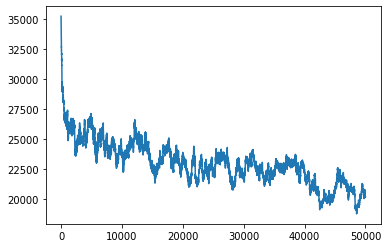

In [28]:
plt.plot(SA.output_data['Distances'])